Caravan Insurance Potential Customer Identification
Kathakali Seth

### Pre-Processing

###### Import Libraries

In [17]:
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE                   # For Oversampling
from outliers import smirnov_grubbs as grubbs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC


import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


###### Read and Partition Data

In [48]:
dataset = read_csv("D:/IIMC EPBA/Active/6. BDM/Project/Caravan/caravan-insurance-challenge.csv",nrows=5822,header='infer')


var=16 

print(dataset.describe())
print('Variables selected :  ', list(dataset.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]))

selected = dataset.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]

X = (dataset[dataset.columns[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]].values)



# Normalization - Using MinMax Scaler
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

y = np.vstack(dataset['CARAVAN'].values)

print('\n')
print('X and y Input Data:   ', X.shape, y.shape)


X_train_original, X_test2, y_train_original, y_test2 = train_test_split(X, y, test_size=0.3,
                                                                        random_state=42)

print('Training Set Shape:   ', X_train_original.shape, y_train_original.shape)

X_val, X_test, y_val, y_test = train_test_split(X_test2, y_test2, test_size=0,random_state=42)
# Used Seed in Partitioning so that Test Set remains same for every Run

print('Validation Set Shape: ', X_val.shape,y_val.shape)
print('Test Set Shape:       ', X_test.shape, y_test.shape)

           MOSTYPE     MAANTHUI      MGEMOMV     MGEMLEEF     MOSHOOFD  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean     24.253349     1.110615     2.678805     2.991240     5.773617   
std      12.846706     0.405842     0.789835     0.814589     2.856760   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

            MGODRK       MGODPR       MGODOV       MGODGE       MRELGE  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      0.696496     4.626932     1.069907     3.258502     6.183442   
std       1.003234     1.715843     1.017503     1.597647     1.909482   
min       0.000000     0.000000     0

###### Outlier Detection

In [58]:
for i in range(var):
    print((grubbs.test(X_train[:,i], alpha=0.025).reshape(-1)).shape)

(7692,)
(7692,)
(7692,)
(7692,)
(7684,)
(7692,)
(7691,)
(7662,)
(7651,)
(7692,)
(7692,)
(7692,)
(7692,)
(7692,)
(7543,)
(7688,)


###### Oversampling of underrepresented class

In [19]:
doOversampling = True

if doOversampling:
# Apply regular SMOTE
    sm = SMOTE(kind='regular')
    X_train, y_train = sm.fit_sample(X_train_original, y_train_original)
    print('Training Set Shape after oversampling:   ', X_train.shape, y_train.shape)
    print(pd.crosstab(y_train,y_train))
else:
    X_train = X_train_original
    y_train = y_train_original

('Training Set Shape after oversampling:   ', (7692, 16), (7692,))
col_0     0     1
row_0            
0      3846     0
1         0  3846


C:\Users\111771\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###### Scatterplot for Variable Selection

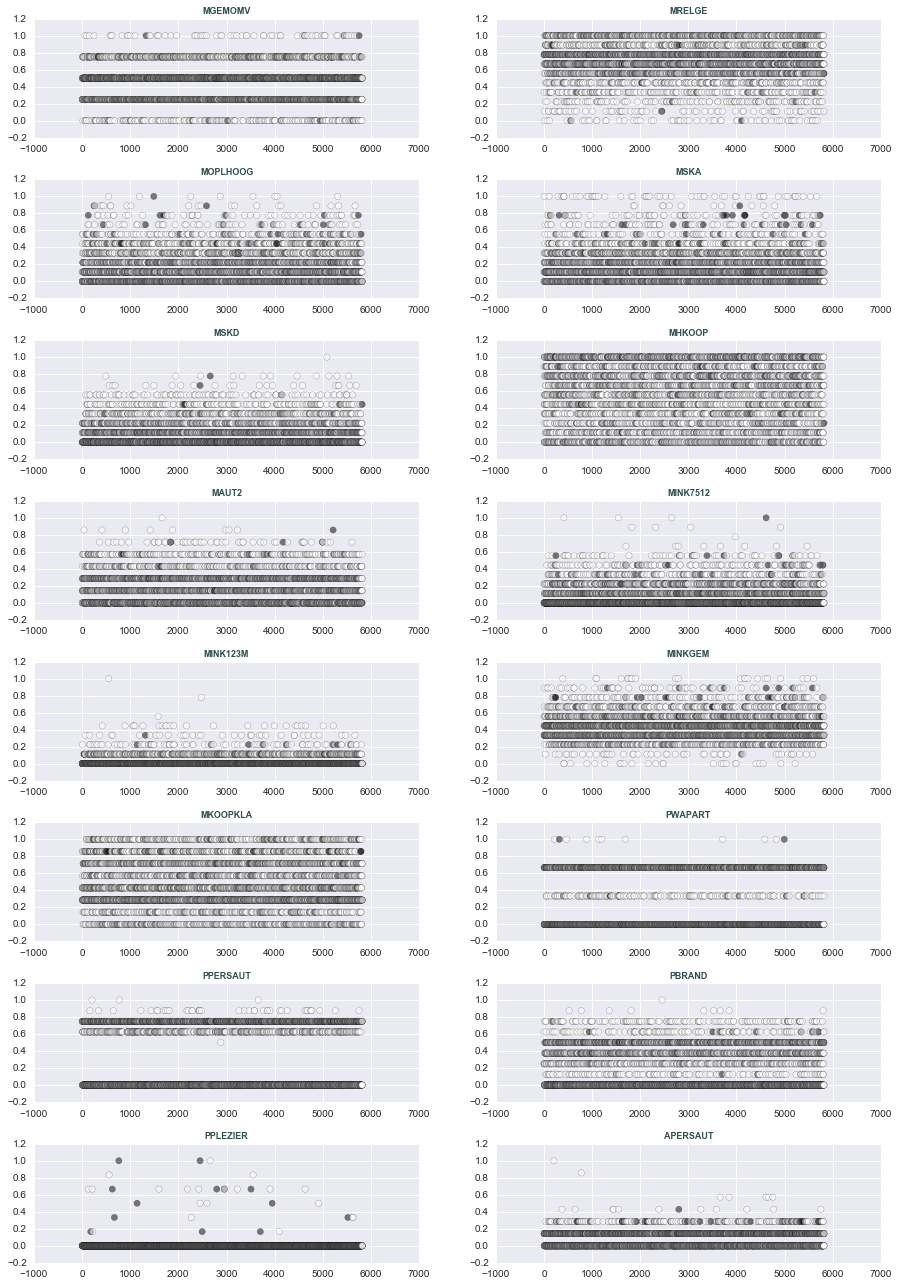

In [21]:
# Plot the feature importances of the forest
plt.figure(figsize=(6 * 2, 2.4 * int(var/2+.5)))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
plt.title("Variable Co-relation with Outcome",size=20)
for i in range(var):
    plt.subplot(8, 2, i+1)
    plt.title(selected[i], size=9,color='darkslategray',fontweight='bold')
    plt.scatter(range(len(X)),X[:,i], s=40, marker= 'o',c=((y[:,0:1])+20).reshape(-1), alpha=0.5)
    plt.yticks()
    plt.xticks()
plt.show()


###### Feature Reduction thru PCA - Not used in final phase

In [22]:
doPCA = False

if doPCA:
    pca = PCA(svd_solver='randomized',n_components=10,random_state=42).fit(X_train)

    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)
    #print(pca.components_)
    #print(pca.explained_variance_)
    #print(pca.explained_variance_ratio_) 
    #print(pca.mean_)
    print(pca.n_components_)
    print(pca.noise_variance_)
    plt.figure(1, figsize=(8, 4.5))
    plt.clf()
    plt.axes([.2, .2, .7, .7])
    plt.plot(pca.explained_variance_, linewidth=2)
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_')
    plt.show()
else:
    X_train = X_train
    X_val = X_val  

###### Flag for Final Run

In [23]:
Final_Run = False          # Will Not Process Test Set if value is False

### Build Models

###### Decision Tree Classifier

In [24]:
clf_DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features=None, 
                                max_leaf_nodes=None, min_impurity_split=1e-07)
clf_DT.fit(X_train, y_train)
y_pred_DT = clf_DT.predict(X_val)

###### Naive Bayes Classifier

In [25]:
clf_NB = BernoulliNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_val)
#print(clf_NB.predict_proba(X_val))

###### Neural Network Classifier

In [26]:
MLPClassifier(activation='relu', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=True,
       warm_start=False)
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))

clf_MLP.fit(X_train, y_train)
y_pred_MLP = clf_MLP.predict(X_val)

###### Logistic Regression Classifier

In [27]:
#clf_Log = LogisticRegression(solver='sag', max_iter=1000, random_state=42,verbose=2)
clf_Log = LogisticRegression(solver='liblinear', max_iter=1000, 
                             random_state=42,verbose=2,class_weight='balanced')

clf_Log.fit(X_train, y_train)
y_pred_Log = clf_Log.predict(X_val)
print(clf_Log.coef_)
print(clf_Log.intercept_)

[LibLinear][[-0.36274528  1.28910602  1.0859172  -0.66860027 -1.45063541  0.20482069
  -0.64726586  0.38511119 -2.37778656  0.1917949   0.69941954  0.59881957
   1.70101053  0.81517548  2.64363224 -0.52793954]]
[-2.33282683]


###### Random Forest Classifier

In [28]:
clf_RF = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=15,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                                bootstrap=True, oob_score=False, n_jobs=1, 
                                random_state=42, verbose=1, warm_start=False, class_weight=None)
clf_RF.fit(X_train, y_train)
y_pred_RF = clf_RF.predict(X_val)

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


###### AdaBoost Classifier

In [29]:
clf_AdaB = AdaBoostClassifier(n_estimators=100)
clf_AdaB.fit(X_train, y_train)
y_pred_AdaB = clf_AdaB.predict(X_val)

###### Gradient Boost Classifier

In [30]:
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
clf_GB.fit(X_train, y_train)
y_pred_GB = clf_GB.predict(X_val)

###### Extra Tree Classifier

In [31]:
clf_ET = ExtraTreesClassifier(n_estimators=250, random_state=42)
clf_ET.fit(X_train, y_train)
y_pred_ET = clf_ET.predict(X_val)

###### SVM Classifier

In [32]:
clf_SVM = SVC(C=10, class_weight='balanced', gamma='auto', kernel='rbf',
              max_iter=-1, probability=True, random_state=42, verbose=True)
clf_SVM.fit(X_train, y_train)
y_pred_SVM = clf_SVM.predict(X_val)

[LibSVM]

In [33]:
y_val = y_val.reshape(-1)

### Model Performance Comparison

###### Compare Accuracy of Models on Validation Set

In [34]:
print('       Accuracy of Models       ')
print('--------------------------------')
print('Decision Tree           '+"{:.2f}".format(accuracy_score(y_val, y_pred_DT)*100)+'%')
print('Naive Bayes             '+"{:.2f}".format(accuracy_score(y_val, y_pred_NB)*100)+'%')
print('Neural Network          '+"{:.2f}".format(accuracy_score(y_val, y_pred_MLP)*100)+'%')
print('Logistic Regression     '+"{:.2f}".format(accuracy_score(y_val, y_pred_Log)*100)+'%')
print('Random Forest           '+"{:.2f}".format(accuracy_score(y_val, y_pred_RF)*100)+'%')
print('AdaBoost                '+"{:.2f}".format(accuracy_score(y_val, y_pred_AdaB)*100)+'%')
print('GradientBoost           '+"{:.2f}".format(accuracy_score(y_val, y_pred_GB)*100)+'%')
print('Extra Tree              '+"{:.2f}".format(accuracy_score(y_val, y_pred_ET)*100)+'%')
print('Support Vector Machine  '+"{:.2f}".format(accuracy_score(y_val, y_pred_SVM)*100)+'%')

       Accuracy of Models       
--------------------------------
Decision Tree           84.72%
Naive Bayes             72.18%
Neural Network          78.65%
Logistic Regression     71.78%
Random Forest           91.41%
AdaBoost                90.27%
GradientBoost           91.41%
Extra Tree              91.41%
Support Vector Machine  78.19%


###### Print Confusion Matrix for all Models

In [35]:
print('Decision Tree  ')
cm_DT = confusion_matrix(y_val,y_pred_DT)
print(cm_DT)
print('\n')

print('Naive Bayes  ')
cm_NB = confusion_matrix(y_val,y_pred_NB)
print(cm_NB)
print('\n')

print('Neural Network  ')
cm_MLP = confusion_matrix(y_val,y_pred_MLP)
print(cm_MLP)
print('\n')

print('Logistic Regression  ')
cm_Log = confusion_matrix(y_val,y_pred_Log)
print(cm_Log)
print('\n')

print('Random Forest  ')
cm_RF = confusion_matrix(y_val,y_pred_RF)
print(cm_RF)
print('\n')

print('AdaBoost  ')
cm_AdaB = confusion_matrix(y_val,y_pred_AdaB)
print(cm_AdaB)
print('\n')

print('GradientBoost  ')
cm_GB = confusion_matrix(y_val,y_pred_GB)
print(cm_GB)
print('\n')

print('Extra Tree  ')
cm_ET = confusion_matrix(y_val,y_pred_ET)
print(cm_ET)
print('\n')

print('SVM  ')
cm_SVM = confusion_matrix(y_val,y_pred_SVM)
print(cm_SVM)

Decision Tree  
[[1447  181]
 [  86   33]]


Naive Bayes  
[[1200  428]
 [  58   61]]


Neural Network  
[[1322  306]
 [  67   52]]


Logistic Regression  
[[1172  456]
 [  37   82]]


Random Forest  
[[1584   44]
 [ 106   13]]


AdaBoost  
[[1555   73]
 [  97   22]]


GradientBoost  
[[1588   40]
 [ 110    9]]


Extra Tree  
[[1587   41]
 [ 109   10]]


SVM  
[[1297  331]
 [  50   69]]


### Test Set Results

###### Compare Models on Training, Validation and Test Set Results

###### Execute only on Final Run

In [37]:
if Final_Run:
    if doPCA:
        X_test = pca.transform(X_test)
        X_train_original = pca.transform(X_train_original)
    y_test = y_test.reshape(-1)
    y_train_original = y_train_original.reshape(-1)
    
    y_pred_train_DT = clf_DT.predict(X_train_original)
    y_pred_train_NB = clf_NB.predict(X_train_original)
    y_pred_train_MLP = clf_MLP.predict(X_train_original)
    y_pred_train_Log = clf_Log.predict(X_train_original)
    y_pred_test_DT = clf_DT.predict(X_test)
    y_pred_test_NB = clf_NB.predict(X_test)
    y_pred_test_MLP = clf_MLP.predict(X_test)
    y_pred_test_Log = clf_Log.predict(X_test)
    cm_DT_train = confusion_matrix(y_train_original,y_pred_train_DT)
    cm_NB_train = confusion_matrix(y_train_original,y_pred_train_NB)
    cm_MLP_train = confusion_matrix(y_train_original,y_pred_train_MLP)
    cm_Log_train = confusion_matrix(y_train_original,y_pred_train_Log)
    cm_DT_test = confusion_matrix(y_test,y_pred_test_DT)
    cm_NB_test = confusion_matrix(y_test,y_pred_test_NB)
    cm_MLP_test = confusion_matrix(y_test,y_pred_test_MLP)
    cm_Log_test = confusion_matrix(y_test,y_pred_test_Log)
    
    print('Decision Tree Classification Matrix  ')
    print('Training')
    print(cm_DT_train)
    print('Validation')
    print(cm_DT)
    print('Test')
    print(cm_DT_test)
    print('\n')

    print('Naive Bayes Classification Matrix ')
    print('Training')
    print(cm_NB_train)
    print('Validation')
    print(cm_NB)
    print('Test')
    print(cm_NB_test)
    print('\n')

    print('Neural Network Classification Matrix ')
    print('Training')
    print(cm_MLP_train)
    print('Validation')
    print(cm_MLP)
    print('Test')
    print(cm_MLP_test)
    print('\n')

    print('Logistic Regression Classification Matrix ')
    print('Training')
    print(cm_Log_train)
    print('Validation')
    print(cm_Log)
    print('Test')
    print(cm_Log_test)
    print('\n')

###### Choose Final Model

Choosing Decision Tree Model as Final Model due to Accuracy + Simplicity

In [38]:
clf = clf_NB

###### Execute only on Final Run

Feature ranking:
1. MINK7512 (0.112318)
2. PPERSAUT (0.109502)
3. MINKGEM (0.100574)
4. MOPLHOOG (0.093942)
5. MKOOPKLA (0.074070)
6. PBRAND (0.070471)
7. MAUT2 (0.068755)
8. MSKD (0.055973)
9. MRELGE (0.055879)
10. MSKA (0.055056)
11. MHKOOP (0.052802)
12. MGEMOMV (0.051910)
13. APERSAUT (0.038557)
14. MINK123M (0.030904)
15. PWAPART (0.022287)
16. PPLEZIER (0.006999)


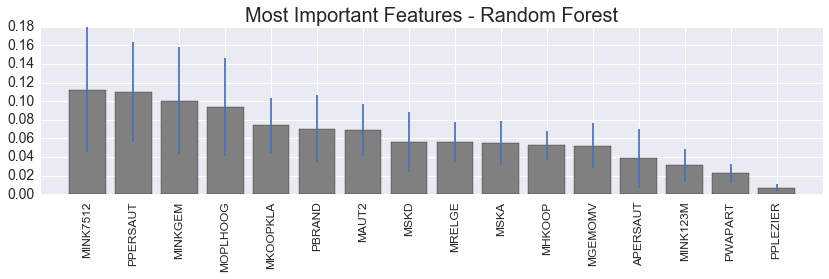

In [39]:
importances_RF = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_],
             axis=0)
indices1 = np.argsort(importances_RF[0:var])[::-1]

indices = indices1[0:var]
# Print the feature ranking
print("Feature ranking:")

for f in range(var):
    print("%d. %s (%f)" % (f + 1, (dataset.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]).reshape(-1)[indices[f]], importances_RF[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(14, 3))
plt.title("Most Important Features - Random Forest",size=20)
plt.bar(range(var), importances_RF[indices],
       color="gray", yerr=std[indices], align="center")
plt.yticks(size=14)
plt.xticks(range(var), (dataset.columns.values[[3,10,16,25,29,31,33,40,41,42,43,44,47,59,61,68]]).reshape(-1)[indices],rotation='vertical',size=12)
plt.xlim([-1, var])
plt.show()

In [40]:
if Final_Run:
    print('Compare Profit from Models - Test Set')
    print('-------------------------------------')

    Profit_DT     = (cm_DT_test[0][0]*TN_amount + cm_DT_test[1][0]*FN_amount + cm_DT_test[0][1]*FP_amount +
                   cm_DT_test[1][1]*TP_amount)
    print('Decision Tree Profit(Rs):        ' + str(Profit_DT))

    Profit_NB     = (cm_NB_test[0][0]*TN_amount + cm_NB_test[1][0]*FN_amount + cm_NB_test[0][1]*FP_amount + 
                  cm_NB_test[1][1]*TP_amount)
    print('Naive Bayes Profit(Rs):          ' + str(Profit_NB))

    Profit_MLP    = (cm_MLP_test[0][0]*TN_amount + cm_MLP_test[1][0]*FN_amount + cm_MLP_test[0][1]*FP_amount + 
                  cm_MLP_test[1][1]*TP_amount)
    print('Neural Network Profit(Rs):       ' + str(Profit_MLP))

    Profit_Log    = (cm_Log_test[0][0]*TN_amount + cm_Log_test[1][0]*FN_amount + cm_Log_test[0][1]*FP_amount + 
                  cm_Log_test[1][1]*TP_amount)
    print('Logistic Regression Profit(Rs):  ' + str(Profit_Log))
    
    
    y_pred_test = clf.predict(X_test)
    print('\n\nBest Model Accuracy on Test Set: '+"{:.2f}".format(accuracy_score(y_test, y_pred_test)*100)+'%')
    print('\nConfusion Matrix on Test Set  ')
    cm = confusion_matrix(y_test,y_pred_test)
    print(cm)
    print('\n')
    Profit = cm[0][0]*TN_amount + cm[1][0]*FN_amount + cm[0][1]*FP_amount + cm[1][1]*TP_amount
    print('Profit(Rs) for Test Set:        ' + str(Profit))
    
    # Checked Actual Positive and Negative Class in Test Set
    Max_Profit = 146*TN_amount + 0*FN_amount + 0*FP_amount + 4*TP_amount
    print('Max_Profit = ' + str(Max_Profit))
    
    print('\n')
    print('Test Set Profit % w.r.t Maximum Profit: ' + "{:.2f}".format(float(Profit)/Max_Profit*100)+'%')
    print('\n')
    print('Final Model')
    print('-----------')
    print(str(clf))

In [47]:
print(str(clf_DT));print('\n')
print(str(clf_NB));print('\n')
print(str(clf_MLP));print('\n')
print(str(clf_Log));print('\n')
print(str(clf_RF));print('\n')
print(str(clf_AdaB));print('\n')
print(str(clf_GB));print('\n')
print(str(clf_ET));print('\n')
print(str(clf_SVM));print('\n')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=64, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=1, penalty='l2', ra